In [1]:
# import packages
!pip install torch
!pip install torch_geometric
!pip install mdapy==0.9.4
!pip install colorama
!pip install rdkit
!pip install datetime
!pip install tensorFlow==2.11.0

!pip install keras==2.11.0

!pip install scikit-learn==1.0.2

!pip install pandas

!pip install numpy

!pip install ase

!pip install openbabel-wheel

!pip install pybel

!pip install dscribe

!pip install scikeras

from rdkit import Chem
from rdkit.Chem import AllChem
from tensorflow import keras

import sys
import os
import numpy as np
import pandas as pd
import math
import ase
from glob import glob
from openbabel import pybel
from dscribe.descriptors import SOAP
from ase.build import molecule
from ase.io import read
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import datetime
import random

from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
#from scikeras.wrappers import KerasRegressor, KerasClassifier

from sklearn.model_selection import train_test_split,RandomizedSearchCV, KFold
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from keras.models import load_model
import matplotlib.lines as mlines
from rdkit.Chem import Draw
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors as rdmd
from rdkit.Chem import PandasTools
from rdkit import RDConfig



# general tools
import numpy as np
import os
import pandas as pd
# RDkit
from rdkit import Chem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix

# Pytorch and Pytorch Geometric
import torch
import torch_geometric
from torch.nn import Linear
from torch_geometric.data import Data
from torch.utils.data import DataLoader
from torch_geometric.data import DataLoader, Batch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.nn as nn
from torch_geometric.nn import global_mean_pool



#jindutiao
from tqdm import tqdm
from datetime import datetime
from colorama import Fore, Back
import time


# 可视化部分
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import random

import mdapy as mp
from mdapy import pltset, cm2inch

from scipy import stats
import seaborn as sns

import math
from sklearn.model_selection import GridSearchCV

from torch_geometric.data import InMemoryDataset  #数据量不是特别大都可以用这个InMemoryDataset
from tqdm import tqdm  #这个是显示进度条的

from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings('ignore')

# import packages

# general tools
import numpy as np
import os
import pandas as pd
# RDkit
from rdkit import Chem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix

# Pytorch and Pytorch Geometric
import torch
import torch_geometric
from torch.nn import Linear
from torch_geometric.data import Data
from torch.utils.data import DataLoader
from torch_geometric.data import DataLoader, Batch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
import torch.nn as nn
from torch_geometric.nn import global_mean_pool


#jindutiao
from tqdm import tqdm
from datetime import datetime
from colorama import Fore, Back


# 可视化部分
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import random

import mdapy as mp
from mdapy import pltset, cm2inch


from scipy import stats
import seaborn as sns

import math
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Pytorch and Pytorch Geometric
import torch
import torch_geometric
from torch.nn import Linear
from torch_geometric.data import Data
from torch.utils.data import DataLoader
from torch_geometric.data import DataLoader, Batch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import GATConv
import torch.nn as nn
from torch_geometric.nn import global_mean_pool

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 740.0/740.0 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 10.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 9.7 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.11.2
    Uninstalling Pygments-2.11.2:
      Successfully uninstalled Pygments-2.11.2
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 10.5 MB/s eta 0:00:0000:0100:01
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
print("PyTorch version {}".format(torch.__version__))
print("PyG version {}".format(torch_geometric.__version__))

PyTorch version 1.13.1+cu116
PyG version 2.4.0


In [3]:
#@title [RUN] Set random seed for deterministic results

def seed(seed=0):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

seed(0)

os.makedirs('personal/GNF-GAT-EOF/dataset', exist_ok=True)
os.makedirs('personal/GNF-GAT-EOF/png', exist_ok=True)
r = pd.read_csv('/bohr/2679-9w16/v1/CHO_compositions.csv')
# 读入数据为单列的smiles编码形式
smiles_list = r['Canonical_SMILES']
#print(smiles_list)
target_list = r['Hf_298.15K_kcal/mol'].values
#print(target_list)
smiles = smiles_list
#r = pd.read_csv('/bohr/2222-xe14/v1/cleandata.csv')
#smiles = r['smiles']
#print(smiles)
#print(smiles.shape)
labels = target_list 
#labels即生成焓的取值，对应y
#labels = r['heat_of_formation (kcal/mol)'].values
#labels = labels
#labels,labels.shape


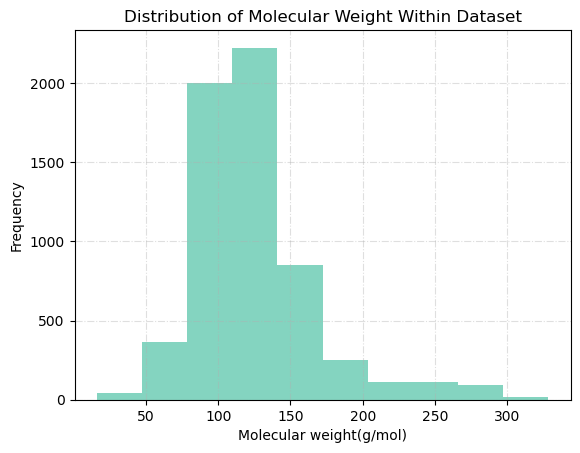

In [4]:
import rdkit.Chem as Chem
from rdkit.Chem import Descriptors

MWs=[]
for smile in smiles:
    mol = Chem.MolFromSmiles(smile)
    if mol is None: continue
    #mols.append(mol)
    MW = rdmd._CalcMolWt(mol)
    #print(MW)
    MWs.append(MW)

# img=Draw.MolsToGridImage(mols,molsPerRow=4,subImgSize=(300,300),legends=['' for x in mols],returnPNG=False)
# img.save('/data/png/filename.png')
#print(MW)

plt.figure() #初始化一张图
#x = life_cycle
plt.hist(MWs, alpha=0.6, histtype='stepfilled',color="#32B897",edgecolor='none')  #直方图关键操作
plt.grid(alpha=0.4,linestyle='-.') #网格线，更好看
plt.xlabel('Molecular weight(g/mol)')
plt.ylabel('Frequency')
plt.title(r'Distribution of Molecular Weight Within Dataset')
plt.savefig('personal/GNF-GAT-EOF/png/MWnew.png')
plt.show()

In [5]:
def one_hot_encoding(x, permitted_list):
    """
    Maps input elements x which are not in the permitted list to the last element
    of the permitted list.
    """

    if x not in permitted_list:
        x = permitted_list[-1]

    binary_encoding = [int(boolean_value) for boolean_value in list(map(lambda s: x == s, permitted_list))]

    return binary_encoding


def get_atom_features(atom, 
                      use_chirality = True, 
                      hydrogens_implicit = True):
    """
    Takes an RDKit atom object as input and gives a 1d-numpy array of atom features as output.
    原子类型、重原子邻居的数量、形式电荷、杂化类型、原子是否在环中、原子是否是芳香族、原子质量、范德华半径和共价半径。
    原子序号、度考虑现在补充  自由基可以后续看情况
    电子属性（该原子提供电子还是接收电子）可以看情况补充
    原子序号:{atom.GetAtomicNum()},  ###这个有必要补充一下
    手性信息:{atom.GetChiralTag()}, 
    度:{atom.GetTotalDegree()},  ###这个有必要补充一下
    电荷:{atom.GetFormalCharge()}, 
    连接氢原子数:{atom.GetTotalNumHs()}, 
    自由基:{atom.GetNumRadicalElectrons()}, #### 这个暂时应该用不到
    杂化类型:{atom.GetHybridization()}, 
    芳香性:{atom.GetIsAromatic()}, 
    是否在环上:{atom.IsInRing()
    """


    # define list of permitted atoms
    
    permitted_list_of_atoms =  ['C','N','O','F','Cl','Br','I', 'Unknown']
    
    if hydrogens_implicit == False:
        permitted_list_of_atoms = ['H'] + permitted_list_of_atoms
    
    # compute atom features
    #atom_Num_env = one_hot_encoding(str(atom.GetAtomicNum()), [1, 6, 7, 8, 9, "other"])
    
    atom_type_enc = one_hot_encoding(str(atom.GetSymbol()), permitted_list_of_atoms)
    
    degree_enc = one_hot_encoding(int(atom.GetTotalDegree()), [0, 1, 2, 3, 4, "MoreThanFour"])
    
    formal_charge_enc = one_hot_encoding(int(atom.GetFormalCharge()), [-3, -2, -1, 0, 1, 2, 3, "Extreme"]) #yes
    
    hybridisation_type_enc = one_hot_encoding(str(atom.GetHybridization()), ["S", "SP", "SP2", "SP3", "OTHER"]) #yes
    
    #degree_enc = one_hot_encoding(str(atom.GetTotalDegree()), [0, 1, 2, 3, 4, 5, 6, 7, 8]) 
    
    is_in_a_ring_enc = [int(atom.IsInRing())] #yes
    
    is_aromatic_enc = [int(atom.GetIsAromatic())]  #yes
    
    atomic_mass_scaled = [float((atom.GetMass() - 10.812)/116.092)]
    
    vdw_radius_scaled = [float((Chem.GetPeriodicTable().GetRvdw(atom.GetAtomicNum()) - 1.5)/0.6)]
    
    covalent_radius_scaled = [float((Chem.GetPeriodicTable().GetRcovalent(atom.GetAtomicNum()) - 0.64)/0.76)]

    atom_feature_vector = atom_type_enc + formal_charge_enc + hybridisation_type_enc + degree_enc + is_in_a_ring_enc + is_aromatic_enc + atomic_mass_scaled + vdw_radius_scaled + covalent_radius_scaled
                                    
    if use_chirality == True:
        chirality_type_enc = one_hot_encoding(str(atom.GetChiralTag()), ["CHI_UNSPECIFIED", "CHI_TETRAHEDRAL_CW", "CHI_TETRAHEDRAL_CCW", "CHI_OTHER"])
        atom_feature_vector += chirality_type_enc
    
    if hydrogens_implicit == True:
        n_hydrogens_enc = one_hot_encoding(int(atom.GetTotalNumHs()), [0, 1, 2, 3, 4, "MoreThanFour"])
        atom_feature_vector += n_hydrogens_enc


    return np.array(atom_feature_vector)


def get_bond_features(bond, 
                      use_stereochemistry = True):
    """
    Takes an RDKit bond object as input and gives a 1d-numpy array of bond features as output.
    键特征有：键类型、键是否共轭、键是否在环中。作为附加选项，用户可以指定是否在双键周围包含 E-Z 立体化学特征。
    
    
    可以补充距离矩阵（原子之间的最短距离）
    """

    permitted_list_of_bond_types = [Chem.rdchem.BondType.SINGLE, Chem.rdchem.BondType.DOUBLE, Chem.rdchem.BondType.TRIPLE, Chem.rdchem.BondType.AROMATIC]

    bond_type_enc = one_hot_encoding(bond.GetBondType(), permitted_list_of_bond_types)
    
    bond_is_conj_enc = [int(bond.GetIsConjugated())]
    
    bond_is_in_ring_enc = [int(bond.IsInRing())]
    
    bond_feature_vector = bond_type_enc + bond_is_conj_enc + bond_is_in_ring_enc
    
    if use_stereochemistry == True:
        stereo_type_enc = one_hot_encoding(str(bond.GetStereo()), ["STEREOZ", "STEREOE", "STEREOANY", "STEREONONE"])
        bond_feature_vector += stereo_type_enc

    return np.array(bond_feature_vector)



def create_pytorch_geometric_graph_data_list_from_smiles_and_labels(x_smiles, y):
    """
    Inputs:
    
    x_smiles = [smiles_1, smiles_2, ....] ... a list of SMILES strings
    y = [y_1, y_2, ...] ... a list of numerial labels for the SMILES strings (such as associated pKi values)
    
    Outputs:
    
    data_list = [G_1, G_2, ...] ... a list of torch_geometric.data.Data objects which represent labeled molecular graphs that can readily be used for machine learning
    
    """
    
    data_list = []
    
    for (smiles, y_vall) in zip(x_smiles, y):
        
        # convert SMILES to RDKit mol object
        mol = Chem.MolFromSmiles(smiles)

        # get feature dimensions
        n_nodes = mol.GetNumAtoms()
        n_edges = 2*mol.GetNumBonds()
        unrelated_smiles = "O=O"
        unrelated_mol = Chem.MolFromSmiles(unrelated_smiles)
        n_node_features = len(get_atom_features(unrelated_mol.GetAtomWithIdx(0)))
        n_edge_features = len(get_bond_features(unrelated_mol.GetBondBetweenAtoms(0,1)))

        # construct node feature matrix X of shape (n_nodes, n_node_features)
        X = np.zeros((n_nodes, n_node_features))

        
        for atom in mol.GetAtoms():
            X[atom.GetIdx(), :] = get_atom_features(atom)
            
        X = torch.tensor(X, dtype = torch.float)
        
        # construct edge index array E of shape (2, n_edges)
        (rows, cols) = np.nonzero(GetAdjacencyMatrix(mol))
        torch_rows = torch.from_numpy(rows.astype(np.int64)).to(torch.long)
        torch_cols = torch.from_numpy(cols.astype(np.int64)).to(torch.long)
        E = torch.stack([torch_rows, torch_cols], dim = 0)
        
        # construct edge feature array EF of shape (n_edges, n_edge_features)
        EF = np.zeros((n_edges, n_edge_features))
        
        for (k, (i,j)) in enumerate(zip(rows, cols)):
            
            EF[k] = get_bond_features(mol.GetBondBetweenAtoms(int(i),int(j)))
        
        EF = torch.tensor(EF, dtype = torch.float)
        
        # construct label tensor
        y_tensor = torch.tensor(np.array([y_vall]), dtype = torch.float)
        
        # construct Pytorch Geometric data object and append to data list
        data_list.append(Data(x = X, edge_index = E, edge_attr = EF, y = y_tensor))

    return data_list


In [6]:
from torch_geometric.data import InMemoryDataset  #数据量不是特别大都可以用这个InMemoryDataset
from tqdm import tqdm  #这个是显示进度条的

class MyDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None):
        super(MyDataset, self).__init__(root, transform, pre_transform) # transform就是数据增强，对每一个数据都执行
        self.data, self.slices = torch.load(self.processed_paths[0])
 
    @property #python装饰器， 只读属性，方法可以像属性一样访问
    def raw_file_names(self): #①检查self.raw_dir目录下是否存在raw_file_names()属性方法返回的每个文件 
                              #②如有文件不存在，则调用download()方法执行原始文件下载
        return []
    @property
    def processed_file_names(self): #③检查self.processed_dir目录下是否存在self.processed_file_names属性方法返回的所有文件，有则直接加载
                                    #④没有就会走process,得到'yoochoose_click_binary_1M_sess.dataset'文件
        return ['MOLECULE.dataset']
 
    def download(self):#①检查self.raw_dir目录下是否存在raw_file_names()属性方法返回的每个文件 
                       #②如有文件不存在，则调用download()方法执行原始文件下载
        pass
    
    def process(self):#④没有就会走process,得到'yoochoose_click_binary_1M_sess.dataset'文件
        data_list = create_pytorch_geometric_graph_data_list_from_smiles_and_labels(smiles, labels)
        data, slices = self.collate(data_list)#转换成可以保存到本地的格式
        torch.save((data, slices), self.processed_paths[0])#保存操作，名字跟yoochoose_click_binary_1M_sess.dataset一致

In [7]:
# create list of molecular graph objects from list of SMILES x_smiles and list of labels y
# data_list = create_pytorch_geometric_graph_data_list_from_smiles_and_labels(smiles, labels)
dataset = MyDataset(root='personal/GNF-GAT-EOF/mydataset')
# create dataloader for training
#dataloader = DataLoader(dataset, batch_size = 4)
print(len(dataset))  # 输出数据集的大小

# 划分数据集为训练集、验证集和测试集
num_samples = len(dataset)
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

num_train = int(train_ratio * num_samples)
num_val = int(val_ratio * num_samples)
num_test = num_samples - num_train - num_val

# num_train = int(train_ratio * num_samples)
# num_val = int(val_ratio * num_samples)
# num_test = int(test_ratio * num_samples)

train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [num_train, num_val, num_test])
train_indices = train_dataset.indices
val_indices = val_dataset.indices
test_indices = test_dataset.indices
# print(type(train_indices))
# print(len(train_indices))
# print(train_indices)

np.savetxt(f'personal/GNF-GAT-EOF/dataset/train_indices.txt',train_indices)
np.savetxt(f'personal/GNF-GAT-EOF/dataset/val_indices.txt',val_indices)
np.savetxt(f'personal/GNF-GAT-EOF/dataset/test_indices.txt',test_indices)


# 保存划分后的数据集为文件
torch.save(train_dataset, 'personal/GNF-GAT-EOF/dataset/train_dataset.pth')
torch.save(val_dataset, 'personal/GNF-GAT-EOF/dataset/val_dataset.pth')
torch.save(test_dataset, 'personal/GNF-GAT-EOF/dataset/test_dataset.pth')


train_dataset = torch.load('personal/GNF-GAT-EOF/dataset/train_dataset.pth')
val_dataset = torch.load('personal/GNF-GAT-EOF/dataset/val_dataset.pth')
test_dataset = torch.load('personal/GNF-GAT-EOF/dataset/test_dataset.pth')
print(f"Created dataset splits with {len(train_dataset)} training, {len(val_dataset)} validation, {len(test_dataset)} test samples.")
#print(train_dataset)
batch_size = 128  # 设置每个小批次的大小
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Processing...
Done!
6074
Created dataset splits with 4859 training, 607 validation, 608 test samples.


In [8]:
#print(train_indices)
#print(len(train_indices))
#print(val_indices)
#print(test_indices)

In [9]:
def get_data_shuffle(train_loader):
    train_loader_data= [i for i in train_loader]
    np.random.seed(0)
    np.random.shuffle(train_loader_data)
    return train_loader_data

cuda
tensor([-4.4370e+01, -1.1820e+01, -8.6530e+01, -7.0090e+01,  4.1300e+00,
         7.9820e+01, -6.1080e+01,  1.7620e+01,  1.1960e+01,  3.1370e+01,
        -2.7460e+01,  4.6730e+01,  2.9550e+01,  7.8660e+01,  7.0530e+01,
        -9.0270e+01,  3.2960e+01, -2.5120e+01, -5.0790e+01, -6.6620e+01,
         5.0080e+01,  6.3870e+01, -4.1950e+01,  2.6580e+01,  3.7350e+01,
        -6.1900e+01,  9.2180e+01,  5.2320e+01,  2.0090e+01, -6.7440e+01,
         3.0120e+01, -6.1850e+01,  2.7290e+01, -7.9840e+01,  1.1000e+00,
        -3.3870e+01, -1.9000e-01, -1.6370e+01,  1.6480e+01, -2.8220e+01,
         6.7500e+00,  1.8320e+01, -3.8700e+00,  2.7550e+01, -4.7690e+01,
         5.7470e+01, -8.3640e+01, -3.7310e+01, -6.9500e+01,  2.4220e+01,
        -7.3810e+01,  3.4350e+01, -2.0040e+01, -4.0000e-02,  6.6130e+01,
        -5.9080e+01, -3.2250e+01, -4.5930e+01, -2.0100e+00, -4.4320e+01,
         8.6900e+00, -6.8210e+01, -3.3260e+01, -2.1000e+00, -6.8570e+01,
        -6.2470e+01,  1.9500e+00,  1.9019e+02,

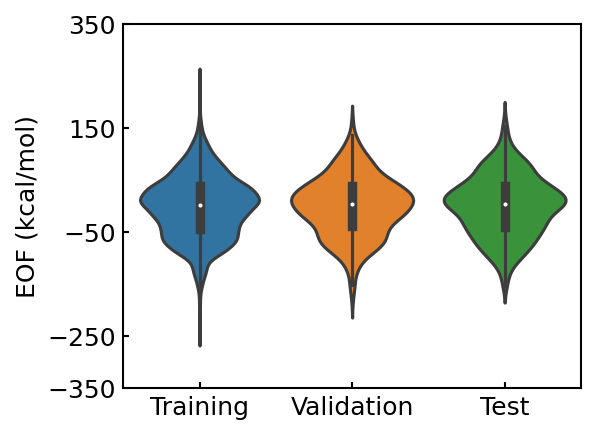

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(device)

# 比较一下y_train和y_test的分布，保证是否随机划分了
y_train = []
y_val = []
y_test = []

for data in get_data_shuffle(train_loader):
    #print(type(data))
    #data = data
    print(data.y)
    print(data)
    data = data.to(device)
    label = data.y
    label = label.to(device)
    y_train.extend(label.detach().cpu().squeeze().numpy().tolist())

for data in val_loader:
    #print(type(data))
    #data = data
    data = data.to(device)
    label = data.y
    label = label.to(device)
    y_val.extend(label.detach().cpu().squeeze().numpy().tolist())
    
for data in test_loader:
    #print(type(data))
    #data = data
    data = data.to(device)
    label = data.y
    label = label.to(device)
    y_test.extend(label.detach().cpu().squeeze().numpy().tolist())
    
#print('----',y_pred)
np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_train.txt',y_train)
np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_val.txt',y_val)
np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_test_true.txt',y_test)

# 使用Seaborn绘制小提琴图，与前面图的区别是这里有训练集和测试集两部分
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
#plt.subplots_adjust(left=0.16, bottom=0.165, top=0.92, right=0.95)
data = [y_train, y_val, y_test]
sns.violinplot(data=data)
#labels = ['Training', 'Test']
plt.xticks([0, 1,2], ['Training', 'Validation','Test'])  # 设置 x 轴刻度和标签
plt.ylim(-350,350)
plt.yticks([-350,-250,-50,150,350])
plt.ylabel('EOF (kcal/mol)')# 添加标签和标题
plt.savefig('personal/GNF-GAT-EOF/png/violin2.png')
plt.show()

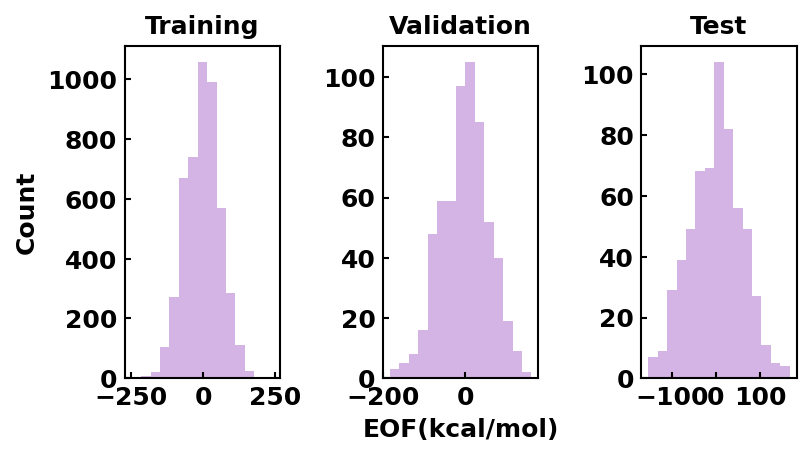

In [11]:
# 使用GridSpec定义子图的位置和大小
gs = GridSpec(1, 3)

pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(14), cm2inch(8)), dpi=150)
plt.rcParams['font.weight'] = 'bold'  # 设置刻度线周围数字的粗细
plt.rcParams['axes.labelweight'] = 'bold'  # 设置轴标签的粗细  

# 子图1 - 直方图
ax1 = plt.subplot(gs[0, 0])
ax1.hist(y_train, alpha=0.6, bins=15,histtype='stepfilled',color="#B883D4",edgecolor='none')
#ax1.legend(loc='upper right', fontsize=8)
ax1.set_title('Training',weight='bold')
ax1.set_ylabel('Count')

# 子图2 - 直方图
ax2 = plt.subplot(gs[0, 1])
ax2.hist(y_val, alpha=0.6, bins=15,histtype='stepfilled',color="#B883D4",edgecolor='none')
ax2.set_xlabel('EOF(kcal/mol)')
ax2.set_title('Validation',weight='bold')

# 子图3 - 直方图
ax3 = plt.subplot(gs[0, 2])
ax3.hist(y_test, alpha=0.6, bins=15,histtype='stepfilled',color="#B883D4",edgecolor='none')
ax3.set_title('Test',weight='bold')

# 调整子图之间的间距

plt.tight_layout()
plt.savefig('personal/GNF-GAT-EOF/png/heat_of_formation.png')
# 显示图
plt.show()

In [12]:
# print(f'Number of features:{dataset.num_features}')
# print(f'Number of classes:{dataset.num_classes}') 

# 将整个数据集中的图信息移动到CUDA
dataset = [data.to(device) for data in dataset]
print(type(dataset))

<class 'list'>


In [13]:
# print(type(dataset))
# print(f"Dataset:{dataset}:")
# print('--------------')
# print(f'Number of graphs:{len(dataset)}')

data = dataset[10]
print(data)
print('-----------------')

# #gather some statistics aboutb the graph
# print(f'number of nodes:{data.num_nodes}')
# print(f'number of edges:{data.num_edges}')
# print(f'average node degree:{data.num_edges/data.num_nodes:.2f}')

# print(f'has isolated nodes:{data.has_isolated_nodes()}')
# print(f'has self-loops:{data.has_self_loops()}')
# print(f'is undirected:{data.is_undirected()}')

# print(f'number of training nodes:{data.train_mask.sum()}')
# print(f'training node label rate:{int(data.train_mask.sum())/data.num_nodes:.2f}')
print(f'number of features:{data.num_features}')

print("Dataset Size:", len(dataset))
#print("Dataset classes:", data.num_classes)
print("Dataset features:", data.num_features)
print("Dataset features:", data.num_nodes)


print(f"\nThis molecule has {data.x.shape[0]} atoms, and {data.edge_attr.shape[0]} edges.")

print(f"\nFor each atom, we are given a feature vector with {data.x.shape[1]} entries (described above).")

print(f"\nFor each edge, we are given a feature vector with {data.edge_attr.shape[1]} entries (also described above).")

print(f"\nIn the next section, we will learn how to build a GNN in the Message Passing flavor to process the node and edge features of molecular graphs and predict their properties.")

#print(f"\nEach atom also has a {data.pos.shape[1]}-dimensional coordinate associated with it. We will talk about their importance later in the practical.")

print(f"\nFinally, we have {data.y.shape[0]} regression target for the entire molecule.")

Data(x=[3, 42], edge_index=[2, 4], edge_attr=[4, 10], y=[1])
-----------------
number of features:42
Dataset Size: 6074
Dataset features: 42
Dataset features: 3

This molecule has 3 atoms, and 4 edges.

For each atom, we are given a feature vector with 42 entries (described above).

For each edge, we are given a feature vector with 10 entries (also described above).

In the next section, we will learn how to build a GNN in the Message Passing flavor to process the node and edge features of molecular graphs and predict their properties.

Finally, we have 1 regression target for the entire molecule.


In [14]:
mols = [Chem.MolFromSmiles(smiles[i]) for i in range(20)]
values = [str(round(float(train_dataset[i].y), 3)) for i in range(20)]

img = Chem.Draw.MolsToGridImage(mols, legends=[f"y = {value}" for value in values], molsPerRow=5,returnPNG=False)

# 保存图像为PNG文件
img.save("personal/GNF-GAT-EOF/png/molecule_grid.png")

In [15]:
class GAT(torch.nn.Module):
    def __init__(self,hidden_channels):
        super().__init__()
        # torch.manual_seed(0)
        self.embed = Linear(42, hidden_channels)
        self.conv1 = GATConv(hidden_channels,hidden_channels)
        self.conv2 = GATConv(hidden_channels,hidden_channels)
        self.lin = Linear(hidden_channels, 1)
        self.graph_data = None
    def forward(self,x,edge_index,batch): 
        x = self.embed(x)
        x=self.conv1(x,edge_index)
        x=x.relu()
        x=F.dropout(x,p=0.6,training=self.training)
        x=self.conv2(x,edge_index)
        x=x.relu()
        # 2. Average Operation
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
        self.graph_data = x
        # 3.Output
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.lin(x)
        x = x.squeeze()
        return x

In [16]:
from datetime import datetime
import time

In [17]:
from torch_geometric.nn import GATConv

In [20]:
#hidden_channels = 512
hidden_channels = 256
model = GAT(hidden_channels).to(device)   #这里data_list放进cuda里面，还是data放cuda里面？以及这段代码要放在最前面吗
optimizer = torch.optim.Adam(model.parameters(),lr=0.001,weight_decay=5e-4)
#optimiser = torch.optim.Adam(model.parameters(), lr = 1e-3)
#loss_function = nn.MSELoss()
loss_function = nn.L1Loss()
#loss_function = nn.CrossEntropyLoss()
loss_function = loss_function.to(device)

# 打印模型的状态字典
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# 打印优化器的状态字典
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

def train(train_loader):
    model.train()
    y_true = []
    y_pred = []
    loss_all = 0
    loss_function_value = 0
    all_data = torch.Tensor([]).to(device)
    for data in get_data_shuffle(train_loader):
        #print(type(data))
        #data = data
        # print(data.y)
        data = data.to(device)
        #print('data',data)
        #print(type(data))
        optimizer.zero_grad()
        output = model(data.x,data.edge_index,data.batch)#data数据传入模型
        #print('output',output)
        label = data.y
        label = label.to(device)
        #print('label',label)
        loss_function_value = loss_function(output, torch.tensor(label, dtype = torch.float32))
        loss_function_value.backward()
        loss_all += loss_function_value.item()*batch_size
        optimizer.step()#梯度更新
        y_pred.extend(output.detach().cpu().squeeze().numpy().tolist())
        y_true.extend(label.detach().cpu().squeeze().numpy().tolist())
        
        if epoch == 400:
            # 获取模型的池化/读出的图数据并保存它
            graph_data = model.graph_data # 模型有名为 graph_data 的成员变量
            graph_data.to(device)

            all_data = torch.cat((all_data, graph_data), dim=0)
            #print('type all_data', type(all_data))
    if epoch == 400:
        print(all_data.shape)
        print(all_data)
        torch.save(all_data, 'personal/GNF-GAT-EOF/dataset/last_epoch_graph_data.pt')
        
        
        #print('----',y_pred)
    np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_train_pred.txt',y_pred)
    np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_train_true.txt',y_true)
    train_error = loss_all / len(train_loader.dataset)
    # 全量样本的rmse和平均loss
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred) 
    RMSE = math.sqrt(mean_squared_error(y_true, y_pred))
    R2 = r2_score(y_pred,y_true)
    # 保留4位小数
    
    R2 = np.round(R2, 4)
    MAE = np.round(MAE, 4)
    RMSE = np.round(RMSE, 4)
    MSE = np.round(MSE, 4)
    
    torch.save(model, 'personal/GNF-GAT-EOF/dataset/net.pkl') 
    return  train_error, R2, MAE, RMSE, MSE



def eval(loader):
    y_true = []
    y_pred = []
    loss_function_value = 0
    model.eval()
    error = 0
    for data in val_loader:
        data = data.to(device)
        with torch.no_grad():
            output = model(data.x,data.edge_index,data.batch)#data数据传入模型
            #print(output)
            label = data.y
            label = label.to(device)
            #print('value label',label)
            #print('label_tensor',torch.tensor(label, dtype = torch.float32))
            loss_function_value = loss_function(output, torch.tensor(label, dtype = torch.float32))
            
            error += loss_function_value.item() * batch_size
            y_true.extend(label.detach().cpu().squeeze().numpy().tolist())
            y_pred.extend(output.detach().cpu().squeeze().numpy().tolist())
    
    if loader == val_loader:
        np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_val_true.txt',y_true)
        np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_val_pred.txt',y_pred)
    if loader == test_loader:
        np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_test_true.txt',y_true)
        np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_test_pred.txt',y_pred)
        
    loader_error = error / len(loader.dataset) 
    # 全量样本的rmse和平均loss
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred) 
    RMSE = math.sqrt(mean_squared_error(y_true, y_pred))
    R2 = r2_score(y_pred,y_true)
    # 保留4位小数
    R2 = np.round(R2, 4)
    MAE = np.round(MAE, 4)
    RMSE = np.round(RMSE, 4)
    MSE = np.round(MSE, 4)
    return  loader_error,R2, MAE, RMSE, MSE

print("\nModel architecture:")
print(model)
total_param = 0
for param in model.parameters():
    total_param += np.prod(list(param.data.size()))
print(f'Total parameters: {total_param}')

train_RMSE_list = []
val_RMSE_list = []
print(f'{datetime.now()} 开始训练...')
best_val_error = None
t = time.time()

for epoch in tqdm(range(1,401)):
    train_loss,train_R2,train_MAE,train_RMSE,train_MSE = train(train_loader)
    val_error,val_R2,val_MAE,val_RMSE,val_MSE = eval(val_loader)
    
    if best_val_error is None or val_error <= best_val_error:
        # Evaluate model on test set if validation metric improves
        #test_error = eval(test_loader)[0]
        test_error,test_R2,test_MAE, test_RMSE, test_MSE = eval(test_loader)
        best_val_error = val_error    
    
    if epoch % 40  == 0:
        print(Fore.CYAN + Back.BLACK, end='')
        tqdm.write(f'Epoch: {epoch} train loss:{train_loss:.4f} train R2: {train_R2:.4f}  train MAE: {train_MAE:.4f} train RMSE: {train_RMSE:.4f} train MSE: {train_MSE:.4f}' , end=' ')
        tqdm.write(f'val error:{val_error:.4f} val R2: {val_R2:.4f} val MAE: {val_MAE:.4f}  val RMSE: {val_RMSE:.4f} val MSE: {val_MSE:.4f}', end=' ')
        tqdm.write(f'test error: {test_error:.4f}', end=' ')
        tqdm.write(f'test R2: {test_R2:.4f} test MAE: {test_MAE:.4f} test RMSE: {test_RMSE:.4f} test MSE: {test_MSE:.4f}', end=' ')
    train_RMSE_list.append(train_RMSE)
    val_RMSE_list.append(val_RMSE)

t = time.time() - t
train_time = t/60
print(f"\nDone! Training took {train_time:.2f} mins. Best validation MAE: {best_val_error:.4f}, corresponding test MAE: {test_error:.7f}.")



# 保存模型
# torch.save(GCN, 'GNN.pt')

torch.save(model.state_dict(),'personal/GNF-GAT-EOF/dataset/stateGNN.pt')

Model's state_dict:
embed.weight 	 torch.Size([256, 42])
embed.bias 	 torch.Size([256])
conv1.att_src 	 torch.Size([1, 1, 256])
conv1.att_dst 	 torch.Size([1, 1, 256])
conv1.bias 	 torch.Size([256])
conv1.lin_src.weight 	 torch.Size([256, 256])
conv1.lin_dst.weight 	 torch.Size([256, 256])
conv2.att_src 	 torch.Size([1, 1, 256])
conv2.att_dst 	 torch.Size([1, 1, 256])
conv2.bias 	 torch.Size([256])
conv2.lin_src.weight 	 torch.Size([256, 256])
conv2.lin_dst.weight 	 torch.Size([256, 256])
lin.weight 	 torch.Size([1, 256])
lin.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0.0005, 'amsgrad': False, 'maximize': False, 'foreach': None, 'capturable': False, 'differentiable': False, 'fused': False, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}]

Model architecture:
GAT(
  (embed): Linear(in_features=42, out_features=256, bias=True)
  (conv1): GATConv(256, 256, heads=1)
  (conv2): GATConv(256, 2

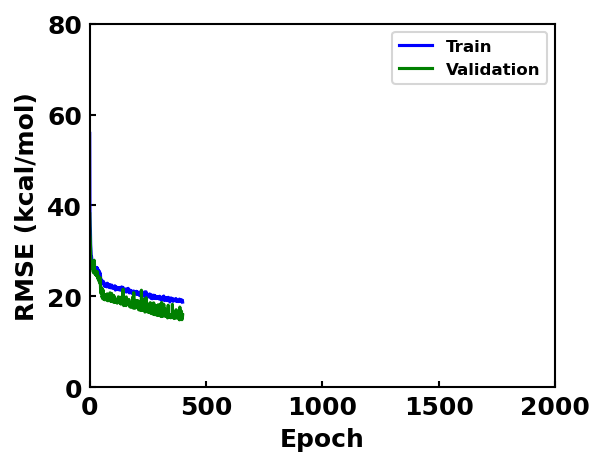

In [21]:
#误差随着epoch变化的图像
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
#plt.subplots_adjust(left=0.16, bottom=0.165, top=0.92, right=0.95)
plt.plot(range(1, 401),train_RMSE_list,color='blue',label='Train') #,label='Train'
plt.plot(range(1, 401),val_RMSE_list,color='green',label='Validation') #,label='Train'
# plt.plot(history.epoch,history.history.get('val_loss'),label='Test',color='red')
plt.legend(prop={'size': 8})
plt.xlabel("Epoch")
plt.ylabel("RMSE (kcal/mol)") 
plt.tight_layout()
#plt.legend()
#plt.grid(alpha=0.9,linestyle='--') 
plt.xlim(0,2000)
plt.ylim(0,80)
plt.savefig('personal/GNF-GAT-EOF/png/epoch1.png')
plt.show()

In [22]:
graph_data_pool = torch.load('personal/GNF-GAT-EOF/dataset/last_epoch_graph_data.pt')
print(graph_data_pool)
print(graph_data_pool.shape)

tensor([[0.0000, 0.0334, 0.2666,  ..., 0.0000, 0.0385, 0.4949],
        [0.1645, 0.1566, 0.2898,  ..., 0.1432, 0.1344, 0.3469],
        [0.0000, 0.0000, 1.4208,  ..., 0.0000, 0.0000, 1.8308],
        ...,
        [0.8783, 1.5048, 0.4875,  ..., 0.8168, 0.7413, 0.5332],
        [0.4243, 0.7079, 0.8368,  ..., 0.4566, 0.0769, 1.0861],
        [0.1300, 0.2143, 0.8266,  ..., 0.1454, 0.1442, 0.8567]],
       device='cuda:0', requires_grad=True)
torch.Size([4859, 256])


In [23]:
# 将张量转换为NumPy数组
graph_data_cpu = graph_data_pool.cpu().detach()
graph_data_numpy = graph_data_cpu.numpy()

# 保存NumPy数组到文本文件
np.savetxt('personal/GNF-GAT-EOF/dataset/graph_data_numpy.txt', graph_data_numpy)


In [24]:
graph_data = np.loadtxt('personal/GNF-GAT-EOF/dataset/graph_data_numpy.txt')
print(graph_data)
print(len(graph_data))
print(graph_data.shape)

[[0.         0.03341212 0.26664966 ... 0.         0.03850734 0.49489465]
 [0.16450898 0.15664531 0.28978539 ... 0.14315498 0.13443293 0.34694877]
 [0.         0.         1.42081285 ... 0.         0.         1.83080125]
 ...
 [0.87827754 1.50477326 0.48751879 ... 0.81678331 0.74129796 0.53321862]
 [0.42434344 0.70787746 0.83680987 ... 0.45658106 0.07690327 1.08606017]
 [0.13002567 0.21426357 0.82655221 ... 0.14535099 0.14421885 0.85674661]]
4859
(4859, 256)


In [25]:
y_train = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_true.txt')
print(y_train)
print(len(y_train))

[-44.36999893 -11.81999969 -86.52999878 ...  34.83000183 -52.43999863
 -71.05999756]
4859


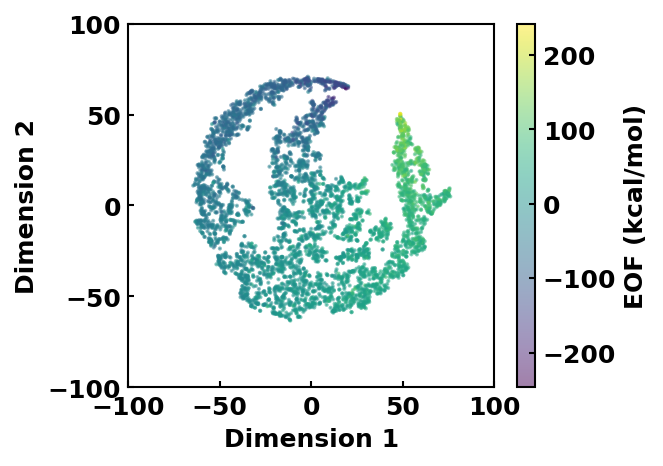

<Figure size 640x480 with 0 Axes>

In [26]:
from sklearn.manifold import TSNE
from matplotlib.cm import get_cmap

colors = y_train
# 使用Scikit-learn的TSNE进行降维
tsne = TSNE(n_components=2, random_state=42)
graph_data_embedded = tsne.fit_transform(graph_data)

# 创建一个散点图来可视化t-SNE结果
cmap = get_cmap('viridis')  
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
plt.rcParams['font.weight'] = 'bold'  # 设置刻度线周围数字的粗细
plt.rcParams['axes.labelweight'] = 'bold'  # 设置轴标签的粗细 
sc = plt.scatter(graph_data_embedded[:, 0], graph_data_embedded[:, 1], c=colors, marker='o', s=1, alpha=0.5)


# # 创建一个散点图来可视化t-SNE结果，并设置颜色
# cmap = get_cmap('viridis')  # 选择颜色映射（可以根据需要选择）
# plt.figure(figsize=(8, 6))
# sc = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=colors, cmap=cmap, marker='o', s=30, alpha=0.5)

# 添加颜色条
cbar = plt.colorbar(sc)
cbar.set_label('EOF (kcal/mol)')  # 设置颜色条的标签
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.xlim(-100,100)
plt.ylim(-100,100)

# 显示图形
plt.show()
plt.savefig('personal/GNF-GAT-EOF/png/tsne.png')

In [27]:
y_test_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_test_pred.txt')
y_test_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_test_true.txt')
y_train_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_pred.txt')
y_train_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_true.txt')
y_val_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_val_pred.txt')
y_val_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_val_true.txt')

In [28]:
print("train R² (R-squared) =", r2_score(y_train_true, y_train_pred))
print("train MAE (Mean Absolute Error) =", mean_absolute_error(y_train_true, y_train_pred))
print("train RMSE (Root Mean Squared Error) =", np.sqrt(mean_squared_error(y_train_true, y_train_pred)))

print("val R² (R-squared) =", r2_score(y_val_true, y_val_pred))
print("val MAE (Mean Absolute Error) =", mean_absolute_error(y_val_true, y_val_pred))
print("val RMSE (Root Mean Squared Error) =", np.sqrt(mean_squared_error(y_val_true, y_val_pred)))

print("test R² (R-squared) =", r2_score(y_test_true, y_test_pred))
print("test MAE (Mean Absolute Error) =", mean_absolute_error(y_test_true, y_test_pred))
print("test RMSE (Root Mean Squared Error) =", np.sqrt(mean_squared_error(y_test_true, y_test_pred)))

train R² (R-squared) = 0.9022467453166382
train MAE (Mean Absolute Error) = 13.119360374399855
train RMSE (Root Mean Squared Error) = 18.754409319944415
val R² (R-squared) = 0.9228370737651352
val MAE (Mean Absolute Error) = 11.060980337983398
val RMSE (Root Mean Squared Error) = 15.923674534952644
test R² (R-squared) = 0.932887500161345
test MAE (Mean Absolute Error) = 10.342935631275669
test RMSE (Root Mean Squared Error) = 14.850485631471058


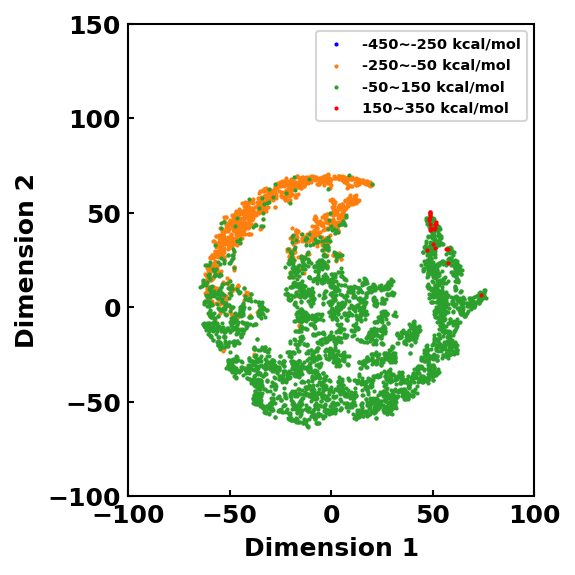

In [29]:
from sklearn.manifold import TSNE
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import mdapy as mp
from mdapy import pltset, cm2inch
from scipy.stats import norm 

# colors = y_train
# 使用Scikit-learn的TSNE进行降维
tsne = TSNE(n_components=2, random_state=42)
descriptors_embedded = tsne.fit_transform(graph_data)

# 创建一个散点图来可视化t-SNE结果
value_range = np.arange(-450, 350, 200)
colors = ['blue', '#ff7f0e', '#2ca02c', 'red']
# colors = cm.jet(np.linspace(0, 1, len(value_range)))

pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(10)), dpi=150)
plt.rcParams['font.weight'] = 'bold'  # 设置刻度线周围数字的粗细
plt.rcParams['axes.labelweight'] = 'bold'  # 设置轴标签的粗细 
# sc = plt.scatter(descriptors_embedded[:, 0], descriptors_embedded[:, 1], c=colors, marker='o', s=3, alpha=0.5)

# 根据数据点的值来着色
for i, value in enumerate(value_range):
    mask = (y_train >= value) & (y_train < value + 200)
    plt.scatter(descriptors_embedded[mask, 0], descriptors_embedded[mask, 1], label=f'{value}~{value+200} kcal/mol', color=colors[i],marker='o', s=1 )
    
# 添加颜色条
# cbar = plt.colorbar(sc)
# cbar.set_label('EOF (kcal/mol)')  # 设置颜色条的标签
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.xlim(-100,100)
plt.ylim(-100,150)

# plt.xticks([])  # 清除 x 轴刻度
plt.yticks([-100,-50,0,50,100,150])  


# 添加图例
plt.legend(fontsize=7,loc='upper right')
plt.tight_layout()
plt.savefig('personal/GNF-GAT-EOF/png/tsnen6.png',dpi=300)
# 显示图形
plt.show()

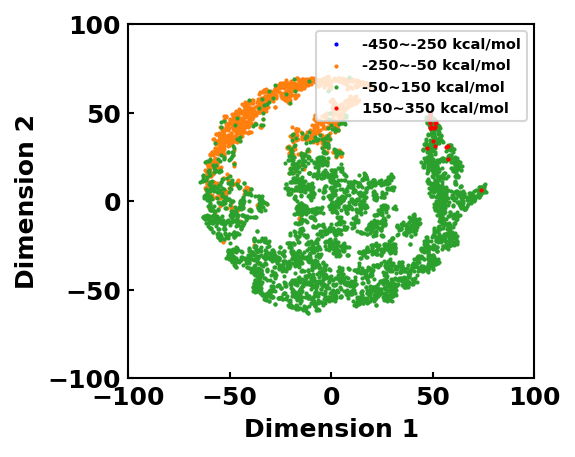

In [30]:
from sklearn.manifold import TSNE
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
import mdapy as mp
from mdapy import pltset, cm2inch
from scipy.stats import norm 

# colors = y_train
# 使用Scikit-learn的TSNE进行降维
tsne = TSNE(n_components=2, random_state=42)
descriptors_embedded = tsne.fit_transform(graph_data)

# 创建一个散点图来可视化t-SNE结果
value_range = np.arange(-450, 350, 200)
colors = ['blue', '#ff7f0e', '#2ca02c', 'red']
# colors = cm.jet(np.linspace(0, 1, len(value_range)))

pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
plt.rcParams['font.weight'] = 'bold'  # 设置刻度线周围数字的粗细
plt.rcParams['axes.labelweight'] = 'bold'  # 设置轴标签的粗细 
# sc = plt.scatter(descriptors_embedded[:, 0], descriptors_embedded[:, 1], c=colors, marker='o', s=3, alpha=0.5)

# 根据数据点的值来着色
for i, value in enumerate(value_range):
    mask = (y_train >= value) & (y_train < value + 200)
    plt.scatter(descriptors_embedded[mask, 0], descriptors_embedded[mask, 1], label=f'{value}~{value+200} kcal/mol', color=colors[i],marker='o', s=1 )
    
# 添加颜色条
# cbar = plt.colorbar(sc)
# cbar.set_label('EOF (kcal/mol)')  # 设置颜色条的标签
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

plt.xlim(-100,100)
plt.ylim(-100,100)

# plt.xticks([])  # 清除 x 轴刻度
plt.yticks([-100,-50,0,50,100])  


# 添加图例
plt.legend(fontsize=7,loc='upper right')
plt.tight_layout()
plt.savefig('personal/GNF-GAT-EOF/png/tsnen10.png',dpi=600)
# 显示图形
plt.show()

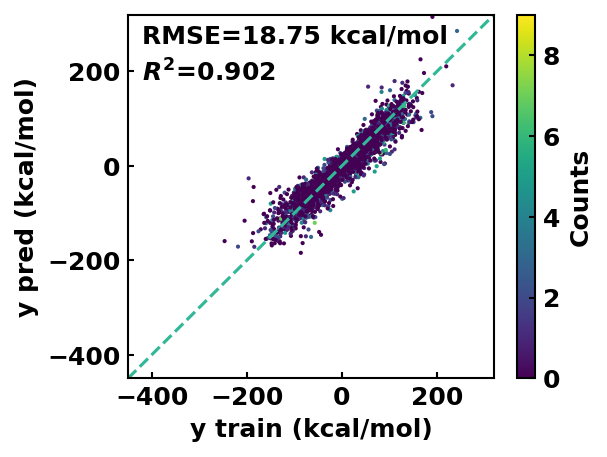

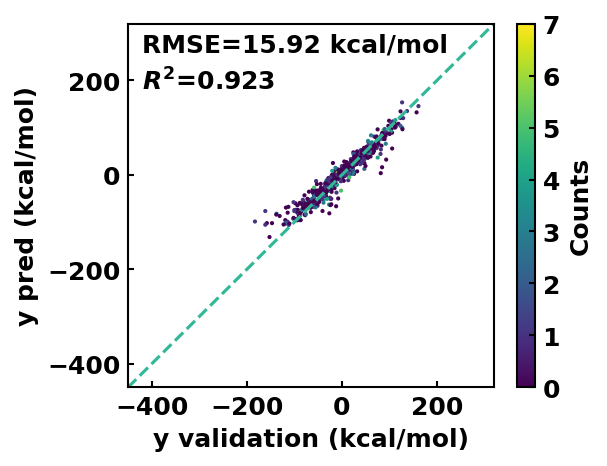

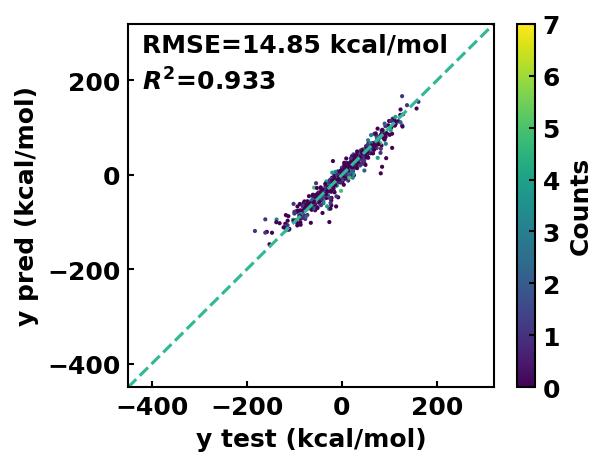

In [31]:
#绘制测试集的真实值和预测值的对比图
from matplotlib.colors import Normalize

def comparison(y_true,y_pred,xlabel,name):
    # 计算直方图的频数
    counts, bins = np.histogram(y_true, bins=len(y_true))
    pltset()
    colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
    fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
    colors = counts
    
    
    norm = Normalize(vmin=min(colors), vmax=max(colors))
    # 使用norm参数设置颜色
    plt.scatter(y_true, y_pred, c=colors, s=1,  norm=norm)  # 使用'viridis'或其他你喜欢的颜色映射

    #plt.scatter(y_true,y_pred,c=colors,s=6)
    cb=plt.colorbar()
    cb.set_label('Counts')
    #绘制对角线
    start_point = (-450, -450)
    end_point = (320, 320)
    plt.axline(start_point, end_point, color='#32B897', linestyle='--') #
    plt.xlabel(xlabel)
    plt.ylabel("y pred (kcal/mol)")
    plt.xlim(-450,320)
    plt.ylim(-450,320)
    #plt.axis('equal')
    # plt.grid(alpha=0.6,linestyle='--') 
    plt.text(
        -420,
        260,
        r"RMSE=%.2f kcal/mol"
        % math.sqrt(mean_squared_error(y_true, y_pred)),
        fontsize=12
        )
    plt.text(-420,180,r"$R^2$=%.3f" % r2_score(y_true, y_pred),fontsize=12)
    
    
    # plt.text(
    #     -420,
    #     270,
    #     r"$R^2$=%.3f, MAE=%.2f kcal/mol"
    #     % (r2_score(y_true, y_pred), mean_absolute_error(y_true, y_pred)),
    #     fontsize=10
    #     )    
    # plt.text(-420,200,r"RMSE=%.2f kcal/mol" % math.sqrt(mean_squared_error(y_true, y_pred)),fontsize=10)
    # plt.tight_layout()
    # plt.savefig(f'./png/{name}.png')
    # plt.show()

comparison(y_train_true,y_train_pred, xlabel = 'y train (kcal/mol)',name = 'train_scatter')
comparison(y_val_true,y_val_pred, xlabel = 'y validation (kcal/mol)',name = 'val_scatter')
comparison(y_test_true,y_test_pred, xlabel = 'y test (kcal/mol)',name = 'test_scatter')

In [32]:
y_test_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_test_pred.txt')
y_test_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_test_true.txt')
y_train_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_pred.txt')
y_train_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_true.txt')
y_val_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_val_pred.txt')
y_val_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_val_true.txt')


train_indices = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/train_indices.txt')
val_indices = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/val_indices.txt')
test_indices = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/test_indices.txt')

#把偏差大的筛选出来
errors = []
for i in range(len(y_test_pred)):
    error = abs(y_test_pred[i] - y_test_true[i])
    error = round(error, 3)
    errors.append(error)
#print(errors)

In [33]:
high_error_id =[]
high_error = []
for n in range(len(errors)):
    if errors[n] > 5:
        #print(n,errors[n],y_test_pred[n],y_test_true[n])
        high_error.append(errors[n])
        high_error_id.append(n)
print(len(high_error))
print(high_error)
print(high_error_id)

382
[11.293, 19.934, 6.221, 10.93, 19.558, 39.762, 67.462, 6.814, 13.485, 10.242, 9.508, 19.104, 13.81, 7.992, 22.774, 5.64, 7.216, 10.512, 21.449, 19.389, 8.252, 11.927, 5.569, 10.049, 11.644, 5.177, 15.376, 16.293, 8.619, 9.907, 14.646, 7.096, 7.331, 12.942, 18.115, 37.111, 11.627, 13.916, 6.201, 5.592, 12.786, 9.879, 48.583, 16.615, 12.48, 14.184, 8.953, 16.239, 5.99, 10.422, 36.144, 19.32, 15.337, 18.545, 15.646, 5.742, 26.981, 10.01, 26.185, 16.977, 66.969, 12.044, 11.7, 31.713, 7.202, 16.504, 9.388, 8.892, 6.092, 6.231, 25.382, 7.757, 8.88, 18.979, 8.45, 9.917, 9.575, 13.139, 7.822, 11.922, 18.776, 11.995, 7.375, 7.33, 14.125, 7.211, 15.151, 12.186, 5.988, 11.409, 16.151, 5.488, 12.697, 6.782, 5.904, 21.137, 24.226, 22.77, 18.47, 9.416, 8.186, 8.076, 39.993, 14.884, 8.833, 26.473, 16.974, 12.092, 10.901, 22.496, 17.343, 11.416, 11.477, 7.754, 9.178, 14.523, 64.074, 9.818, 6.284, 10.204, 9.057, 12.162, 9.367, 6.179, 8.163, 15.585, 16.774, 16.108, 14.687, 7.334, 10.547, 5.872, 19.1

In [34]:
#找到误差值大的smiles的编号
high_error_smiles_id_list = []
for c in high_error_id:
    high_error_smiles_id=test_indices[c]
    #print(high_error_smiles_id)
    high_error_smiles_id_list.append(high_error_smiles_id)
print(high_error_smiles_id_list)

high_error_smiles_list = []
for id in high_error_smiles_id_list:
    high_error_smiles = smiles[id]
    # print(high_error_smiles)
    high_error_smiles_list.append(high_error_smiles)
print(high_error_smiles_list)

[5298.0, 3417.0, 1069.0, 4851.0, 1343.0, 1405.0, 4300.0, 2232.0, 3936.0, 1965.0, 2357.0, 3198.0, 2259.0, 3199.0, 3556.0, 514.0, 3907.0, 2313.0, 4439.0, 4057.0, 3680.0, 529.0, 1850.0, 4174.0, 2567.0, 1208.0, 4229.0, 5982.0, 3433.0, 4145.0, 2538.0, 5922.0, 2002.0, 5030.0, 4724.0, 4913.0, 75.0, 1079.0, 5360.0, 4882.0, 4692.0, 4654.0, 4874.0, 5517.0, 32.0, 5900.0, 1039.0, 4751.0, 2339.0, 3558.0, 5323.0, 53.0, 5724.0, 5502.0, 1975.0, 4989.0, 1382.0, 733.0, 2790.0, 1772.0, 5402.0, 2986.0, 800.0, 5114.0, 1296.0, 2871.0, 5524.0, 1987.0, 4618.0, 3141.0, 1034.0, 474.0, 2113.0, 4101.0, 4831.0, 1644.0, 4022.0, 628.0, 5965.0, 3541.0, 1493.0, 3158.0, 3281.0, 880.0, 4412.0, 2456.0, 5143.0, 1085.0, 1656.0, 4456.0, 353.0, 1202.0, 4927.0, 2717.0, 61.0, 4600.0, 4217.0, 4755.0, 2761.0, 8.0, 4887.0, 3563.0, 4798.0, 315.0, 5316.0, 3388.0, 2772.0, 341.0, 1991.0, 2228.0, 3502.0, 3216.0, 3167.0, 3346.0, 4399.0, 406.0, 2798.0, 688.0, 3148.0, 3312.0, 2928.0, 4634.0, 2136.0, 3710.0, 2636.0, 2822.0, 886.0, 1341.0,

In [35]:
from rdkit.Chem import Draw

#把偏差大的画出来，每行6个
smis=high_error_smiles_list
mols = []
for smi in smis:
    mol = Chem.MolFromSmiles(smi)
    mols.append(mol)

img = Draw.MolsToGridImage(
    mols,
    molsPerRow=10,
    subImgSize=(300,200),
    legends=[x for x in high_error_smiles_list],
    returnPNG=False
)
    
img.save('personal/GNF-GAT-EOF/png/ERRORMOL.jpg')

In [36]:
# general tools
import numpy as np
import os
import pandas as pd
# 可视化部分
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import random

import mdapy as mp
from mdapy import pltset, cm2inch


from scipy import stats
import seaborn as sns

y_test_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_test_pred.txt')
y_test_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_test_true.txt')

error = y_test_pred - y_test_true
abs_error = abs(error)
np.savetxt(f'personal/GNF-GAT-EOF/dataset/error.txt',error)
np.savetxt(f'personal/GNF-GAT-EOF/dataset/abs_error.txt',abs_error)


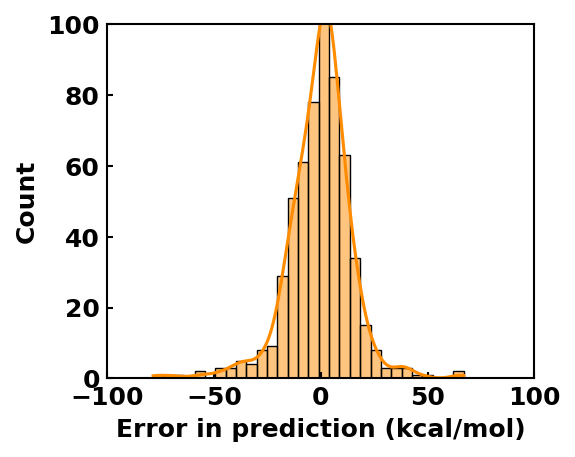

In [37]:
import seaborn as sns
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
# 使用 Seaborn 绘制带有 KDE 拟合的直方图
sns.histplot(error, kde=True, color='#FF8C00', bins=30)  # 设置 kde=True 启用拟合

# 添加标签和标题
plt.xlabel('Error in prediction (kcal/mol)')
plt.ylabel('Count')
plt.xlim(-100,100)
plt.ylim(0,100)
plt.xticks([-100,-50,0,50,100])

# plt.title('Histogram with KDE Fit')
plt.tight_layout()
plt.savefig('personal/GNF-GAT-EOF/png/errorx1.png')
# 显示图形
plt.show()


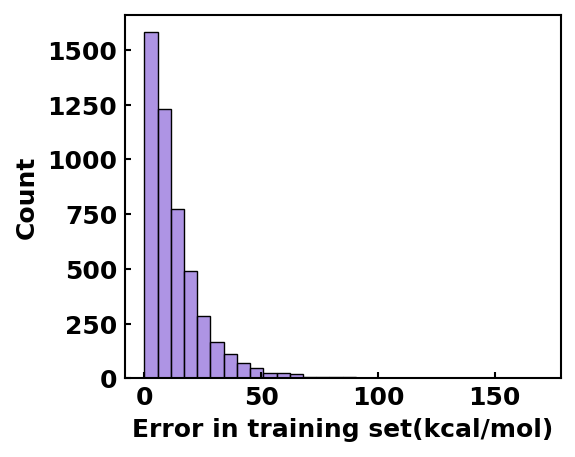

In [38]:
# general tools
import numpy as np
import os
import pandas as pd
# 可视化部分
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

import random

import mdapy as mp
from mdapy import pltset, cm2inch


from scipy import stats
import seaborn as sns


y_train_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_pred.txt')
y_train_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_true.txt')

error_train = y_train_pred - y_train_true
abs_error_train = abs(error_train)
np.savetxt(f'personal/GNF-GAT-EOF/dataset/error.txt',error_train)
np.savetxt(f'personal/GNF-GAT-EOF/dataset/abs_error.txt',abs_error_train)

import seaborn as sns
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
# 使用 Seaborn 绘制带有 KDE 拟合的直方图
sns.histplot(abs_error_train, color='mediumpurple', bins=30)  # 设置 kde=True 启用拟合
plt.xlim()
# 添加标签和标题
plt.xlabel('Error in training set(kcal/mol)')
plt.ylabel('Count')
# plt.title('Histogram with KDE Fit')
plt.tight_layout()
plt.savefig('personal/GNF-GAT-EOF/png/errorcount1.png',dpi=300)
# 显示图形
plt.show()

In [39]:
def test():
    model.eval()
    y_true = []
    y_pred = []
    loss_value =  0
    for data in test_loader:
        data = data.to(device)
        with torch.no_grad():
            pred = model(data.x,data.edge_index,data.batch)
            #print(pred)
            label = data.y
            label = label.to(device)
            loss_value = loss_function(pred, torch.tensor(label, dtype = torch.float32))
            y_pred.extend(pred.detach().cpu().squeeze().numpy().tolist())
            y_true.extend(label.detach().cpu().squeeze().numpy().tolist())
    np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_test_pred.txt',y_pred)
    np.savetxt(f'personal/GNF-GAT-EOF/dataset/y_test_true.txt',y_true)

    #print('----------------')
    # 全量样本的rmse和平均loss
    MAE = mean_absolute_error(y_true, y_pred)
    MSE = mean_squared_error(y_true, y_pred)
    RMSE = math.sqrt(mean_squared_error(y_true, y_pred))
    R2 = r2_score(y_pred,y_true)
    # 保留4位小数
    R2 = np.round(R2, 4)
    MAE = np.round(MAE, 4)
    RMSE = np.round(RMSE, 4)
    MSE = np.round(MSE, 4)

    torch.save(model, 'personal/GNF-GAT-EOF/dataset/net.pkl')
    return  R2, MAE, RMSE, MSE

test_R2,test_MAE, test_RMSE, test_MSE = test()
print(Fore.CYAN + Back.BLACK, end='')
tqdm.write(f'test R2: {test_R2:.4f}', end=' ')
tqdm.write(f'test MAE: {test_MAE:.4f}', end=' ')
tqdm.write(f'test RMSE: {test_RMSE:.4f}', end=' ')
tqdm.write(f'test MSE: {test_MSE:.4f}', end=' ')

test R2: 0.9019 test MAE: 11.5401 test RMSE: 16.6874 test MSE: 278.4708 

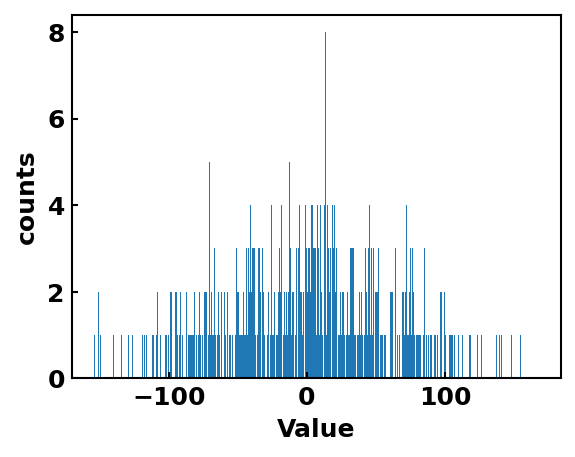

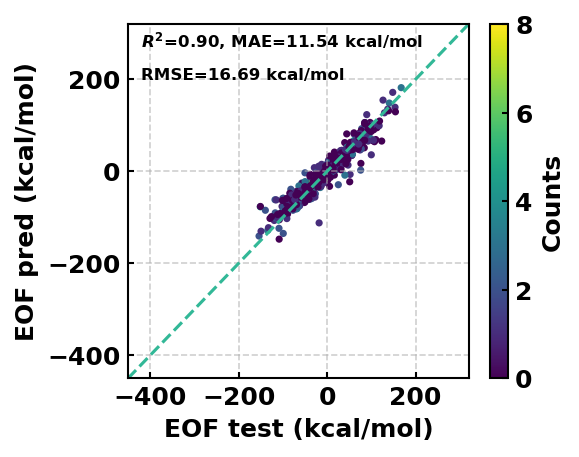

In [40]:
y_test_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_test_pred.txt')
y_test_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_test_true.txt')
y_train_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_pred.txt')
y_train_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_true.txt')

# 计算直方图的频数
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
counts, bins, patches = plt.hist(y_test_true, bins=len(y_test_true))
#print("counts",counts)
#plt.title('test distributions')
plt.xlabel('Value')
plt.ylabel('counts')
plt.tight_layout()
plt.savefig('personal/GNF-GAT-EOF/png/testdistributions.png')
plt.show()

#绘制测试集的真实值和预测值的对比图
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
colors = counts
plt.scatter(y_test_true,y_test_pred,c=colors,s=6)
cb=plt.colorbar()
cb.set_label('Counts')
#绘制对角线
start_point = (-450, -450)
end_point = (320, 320)
plt.axline(start_point, end_point, color='#32B897', linestyle='--') #
plt.xlabel("EOF test (kcal/mol)")
plt.ylabel("EOF pred (kcal/mol)")
plt.xlim(-450,320)
plt.ylim(-450,320)
#plt.axis('equal')
plt.grid(alpha=0.6,linestyle='--')
# plt.text(
#     -420,
#     270,
#     r"$R^2$=%.2f, MAE=%.2f kcal/mol"
#     % (r2_score(y_test_true, y_test_pred), mean_absolute_error(y_test_true, y_test_pred)),
#     fontsize=8
#     )
# plt.text(-420,200,r"RMSE=%.2f kcal/mol" % math.sqrt(mean_squared_error(y_test_true, y_test_pred)),fontsize=8)

plt.text(
    -420,
    270,
    r"$R^2$=%.2f, MAE=%.2f kcal/mol"
    % (test_R2, test_MAE),
    fontsize=8
    )
plt.text(-420,200,r"RMSE=%.2f kcal/mol" % test_RMSE,fontsize=8)

plt.tight_layout()
plt.savefig('personal/GNF-GAT-EOF/png/scatter1.png')
plt.show()

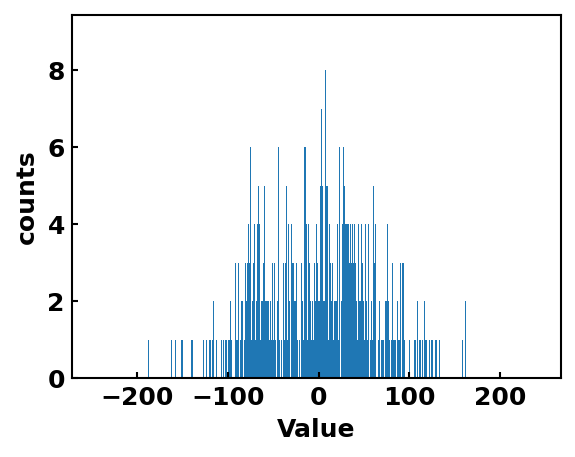

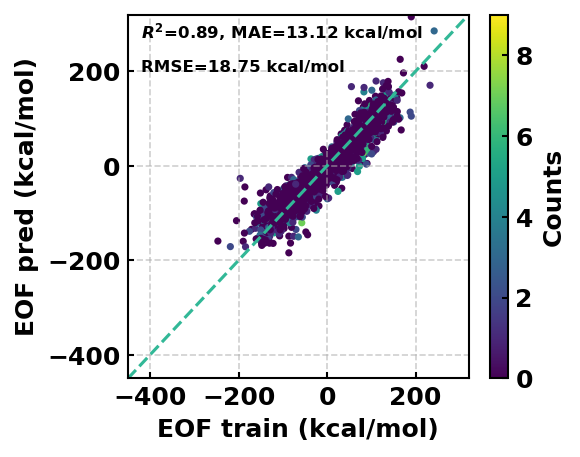

In [41]:
y_test_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_test_pred.txt')
y_test_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_test_true.txt')
y_train_pred = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_pred.txt')
y_train_true = np.loadtxt(f'personal/GNF-GAT-EOF/dataset/y_train_true.txt')

# 计算直方图的频数
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
counts, bins, patches = plt.hist(y_train_true, bins=len(y_train_true))
#print("counts",counts)
#plt.title('test distributions')
plt.xlabel('Value')
plt.ylabel('counts')
plt.tight_layout()
plt.savefig('personal/GNF-GAT-EOF/png/testdistributionis.png')
plt.show()

#绘制测试集的真实值和预测值的对比图
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
colors = counts
plt.scatter(y_train_true,y_train_pred,c=colors,s=6)
cb=plt.colorbar()
cb.set_label('Counts')
#绘制对角线
start_point = (-450, -450)
end_point = (320, 320)
plt.axline(start_point, end_point, color='#32B897', linestyle='--') #
plt.xlabel("EOF train (kcal/mol)")
plt.ylabel("EOF pred (kcal/mol)")
plt.xlim(-450,320)
plt.ylim(-450,320)
#plt.axis('equal')
plt.grid(alpha=0.6,linestyle='--')
# plt.text(
#     -420,
#     270,
#     r"$R^2$=%.2f, MAE=%.2f kcal/mol"
#     % (r2_score(y_test_true, y_test_pred), mean_absolute_error(y_test_true, y_test_pred)),
#     fontsize=8
#     )
# plt.text(-420,200,r"RMSE=%.2f kcal/mol" % math.sqrt(mean_squared_error(y_test_true, y_test_pred)),fontsize=8)

plt.text(
    -420,
    270,
    r"$R^2$=%.2f, MAE=%.2f kcal/mol"
    % (train_R2, train_MAE),
    fontsize=8
    )
plt.text(-420,200,r"RMSE=%.2f kcal/mol" % train_RMSE,fontsize=8)

plt.tight_layout()
plt.savefig('personal/GNF-GAT-EOF/png/scatter12.png')
plt.show()

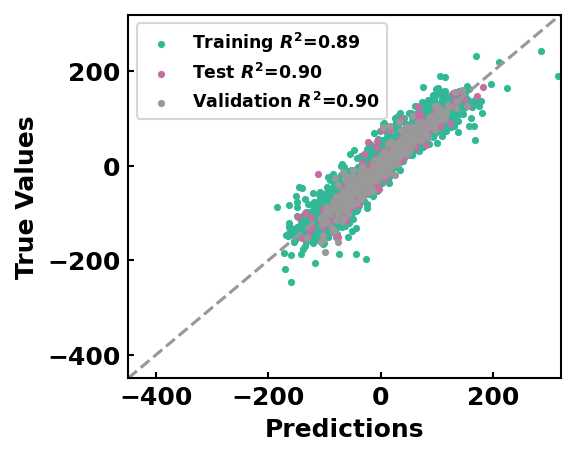

In [42]:
#把训练集和测试集的结果放一起绘图
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
plt.axis([-450, 320, -450, 320])
plt.scatter(y_train_pred, y_train_true, color="#32B897", label=r"Training $R^2$=%.2f" % (train_R2),s=6)
plt.scatter(y_test_pred, y_test_true, color="#C76DA2", label=r"Test $R^2$=%.2f" % (test_R2),s=6)
plt.scatter(y_val_pred, y_val_true, color="#999999", label=r"Validation $R^2$=%.2f" % (val_R2),s=6)
#绘制对角线
start_point = (-450, -450)
end_point = (320, 320)
plt.axline(start_point, end_point, color='#999999', linestyle='--')

plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.legend(fontsize='small')
# plt.text(
#     -420,
#     270,
#     "Training:0.98"
#     )
# plt.text(
#     -420,
#     270,
#     r"$R_train^2$=%.2f, $R_test^2$=%.2f"
#     % r2_score(y_train,y_pred0),(r2_score(y_test, y_pred),
#     #fontsize=9
#     )

plt.tight_layout()

plt.savefig('personal/GNF-GAT-EOF/png/scatter21.png')
plt.show()

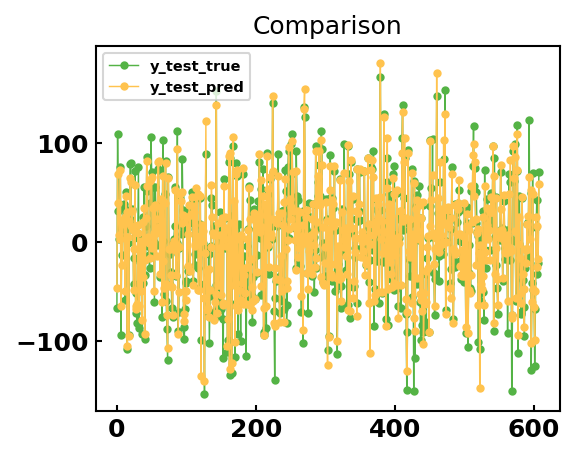

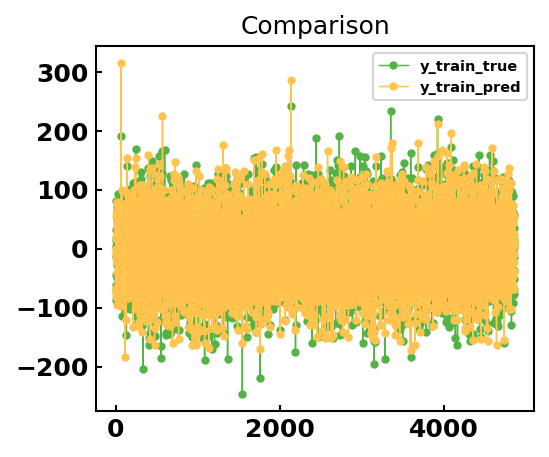

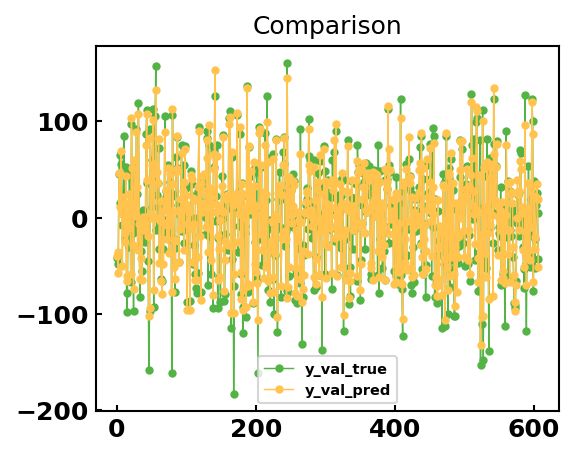

In [43]:
#另一种样式的对比图
def plotVersusFigureytest(y_test,y_pred):
    pltset()
    colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
    fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
    plt.plot(y_test,'o-',color="#54B345",linewidth=0.7,markersize='3')
    plt.plot(y_pred,'o-',color="#ffc34e",linewidth=0.7,markersize='3')
    plt.legend(loc='best',labels=["y_test_true","y_test_pred"],prop={"size": 7})
    plt.title(r'Comparison')
    plt.tight_layout()
    plt.savefig('personal/GNF-GAT-EOF/png/Comparison1.png')
    plt.show()

def plotVersusFigureytrain(y_train,y_pred0):
    pltset()
    colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
    fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
    plt.plot(y_train,'o-',color="#54B345",linewidth=0.7,markersize='3')
    plt.plot(y_pred0,'o-',color="#ffc34e",linewidth=0.7,markersize='3')
    plt.legend(loc='best',labels=["y_train_true","y_train_pred"],prop={"size": 7})
    plt.title(r'Comparison')
    plt.tight_layout()
    plt.savefig('personal/GNF-GAT-EOF/png/Comparison2.png')
    plt.show()
    
def plotVersusFigureyval(y_val,y_pred1):
    pltset()
    colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
    fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
    plt.plot(y_val,'o-',color="#54B345",linewidth=0.7,markersize='3')
    plt.plot(y_pred1,'o-',color="#ffc34e",linewidth=0.7,markersize='3')
    plt.legend(loc='best',labels=["y_val_true","y_val_pred"],prop={"size": 7})
    plt.title(r'Comparison')
    plt.tight_layout()
    plt.savefig('personal/GNF-GAT-EOF/png/Comparison3.png')
    plt.show()

plotVersusFigureytest(y_test_true,y_test_pred)
plotVersusFigureytrain(y_train_true,y_train_pred)
plotVersusFigureyval(y_val_true,y_val_pred)

In [44]:
from rdkit.Chem import Draw
import os

# Replace r['smiles'] with your actual list of SMILES
all_smiles = r['Canonical_SMILES']

batch_size = 50
num_batches = len(all_smiles) // batch_size

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    smiles_batch = all_smiles[start_idx:end_idx]

    mols = []

    for smile in smiles_batch:
        mol = Chem.MolFromSmiles(smile)
        mols.append(mol)

    img = Draw.MolsToGridImage(
        mols,
        molsPerRow=10,
        subImgSize=(200, 200),
        legends=[x for x in smiles_batch],
        returnPNG=False
    )

    os.makedirs('personal/GNF-GAT-EOF/Species_Images', exist_ok=True)

    img.save(f'personal/GNF-GAT-EOF/Species_Images/{start_idx}_{end_idx - 1}.png', dpi=(300, 300))


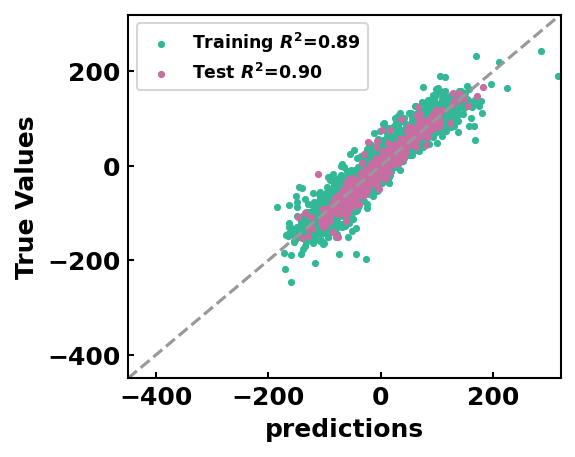

In [45]:
#把训练集和测试集的结果放一起绘图
pltset()
colorlist = [i["color"] for i in list(plt.rcParams["axes.prop_cycle"])]
fig = plt.figure(figsize=(cm2inch(10), cm2inch(8)), dpi=150)
plt.axis([-450, 320, -450, 320]) 
plt.scatter(y_train_pred, y_train_true, color="#32B897", label=r"Training $R^2$=%.2f" % (train_R2),s=6)  
plt.scatter(y_test_pred, y_test_true, color="#C76DA2", label=r"Test $R^2$=%.2f" % (test_R2),s=6)
#绘制对角线
start_point = (-450, -450)
end_point = (320, 320)
plt.axline(start_point, end_point, color='#999999', linestyle='--') 

plt.xlabel('predictions')
plt.ylabel('True Values')
plt.legend(fontsize='small')
# plt.text(
#     -420,
#     270,
#     "Training:0.98"
#     )
# plt.text(
#     -420,
#     270,
#     r"$R_train^2$=%.2f, $R_test^2$=%.2f"
#     % r2_score(y_train,y_pred0),(r2_score(y_test, y_pred),
#     #fontsize=9
#     )

plt.tight_layout()

plt.savefig('personal/GNF-GAT-EOF/png/scatter112.png')
plt.show()
